# ARIMA model
An ARMA model that also includes a integration part, I(d) that differences the time series to convert it from non-stationary to stationary. ARIMA(p, d, q).

## Exploring the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [67]:
sns.set_style('whitegrid')

In [73]:
df = pd.read_csv("Datasets/jj.csv", index_col=0, parse_dates=True)
df.head()

,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


In [74]:
df.describe()

,data
count,84.000000
mean,4.799762
std,4.309991
min,0.440000
25%,1.247500
50%,3.510000
75%,7.132500
max,16.200000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 1960-01-01 to 1980-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    84 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


* The data is entered in qaurters of each year.

<AxesSubplot:xlabel='date'>

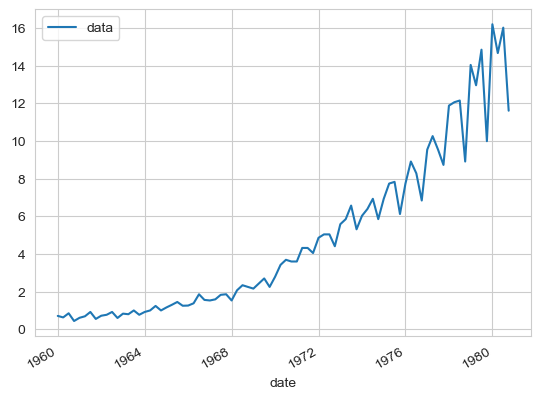

In [76]:
df.plot()

* We can see that there is an overall increasing trend in the data.
* So the data is not stationary.
* We can apply the ADF test to confirm this.

In [9]:
from statsmodels.tsa.stattools import adfuller
ADF = adfuller(df.data)
print("ADF Statistic = {}".format(ADF[0]))
print("p-value = {}".format(ADF[1])) 

ADF Statistic = 2.742016573457481
p-value  = 1.0


* As the p-value is > 0.05 this confirms our speculation that the data is stationary.
* So we need to difference the data for stationarity.

## Differencing the data for stationarity

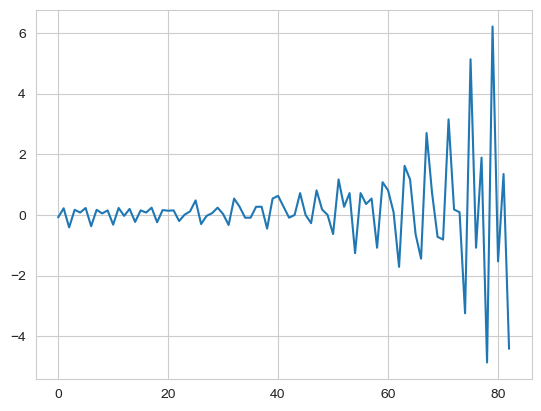

In [10]:
diff1 = np.diff(df.data, n=1)
plt.plot(diff1)

In [12]:
from statsmodels.tsa.stattools import adfuller
ADF_diff1 = adfuller(diff1)
print("ADF Statistic = {}".format(ADF_diff1[0]))
print("p-value = {}".format(ADF_diff1[1])) 

ADF Statistic = -0.40740976363803905
p-value = 0.9088542416911317


* We can see that even after first differencing, the data is not stationary as it does not pass the ADF test. 

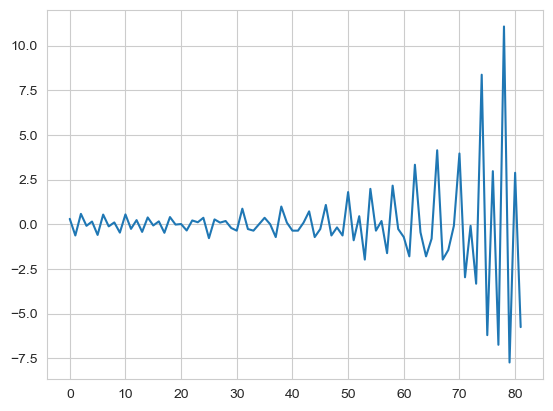

In [15]:
diff2 = np.diff(df.data, n=2)
plt.plot(diff2)

In [16]:
from statsmodels.tsa.stattools import adfuller
ADF_diff2 = adfuller(diff2)
print("ADF Statistic = {}".format(ADF_diff2[0]))
print("p-value = {}".format(ADF_diff2[1])) 

ADF Statistic = -3.585162874793187
p-value = 0.006051099869603033


* As we can see after second differencing, the data becomes stationary.
* So, the order of integration for our ARIMA model, d=2. 

## Splitting the data for training and testing

In [17]:
df.tail()

,data
date,
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67
1980-07-02,16.02
1980-10-01,11.61


* We choose to predict the data for the year 1980, the rest of the data is for training.

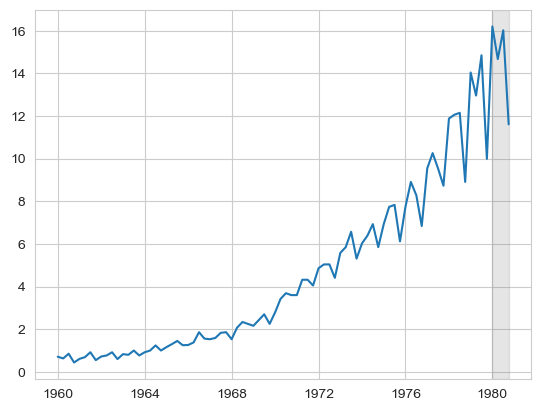

In [23]:
plt.plot(df.index, df.data)
plt.axvspan('1980-01-01', '1980-10-01', color='#808080', alpha=0.2)

In [77]:
df = pd.read_csv("Datasets/jj.csv")
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [78]:
train = df['data'][:-4]
test = df['data'][-4:]

In [79]:
len(df.data), len(train), len(test)

(84, 80, 4)

## Selecting the model

In [24]:
from itertools import product
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 2

pq_list = list(product(ps, qs))
pq_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
def optimize_ARIMA(pq_list, data, d) -> pd.DataFrame:
    """This function gets the list of all p, q values and the d value, creates the model for each of the (p, d, q) values and then finds the AIC value of each of the model and displays the output as a 
    dataframe in ascending order of AIC values"""
    result = []
    for p,q in pq_list:
        model = SARIMAX(data, order=(p, d, q), simple_differencing=False).fit(disp=False)
        aic = model.aic
        result.append([(p, q), aic])
    result_df = pd.DataFrame(result)
    result_df.columns = ['(p, q)', 'AIC']
    # Sorting in ascending order
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [80]:
result_df = optimize_ARIMA(pq_list, train, 2)
result_df

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\mode

,"(p, q)",AIC
0,"(3, 3)",115.271638
1,"(3, 1)",115.624980
2,"(3, 2)",115.672008
3,"(3, 0)",154.430623
4,"(0, 3)",194.654716
5,"(0, 2)",209.274514
6,"(2, 3)",220.666792
7,"(1, 3)",228.267645
8,"(1, 2)",228.935849
9,"(2, 2)",229.974669


* From the above we can see that the best fitting model would be ARIMA(3, 2, 3).

In [81]:
model = SARIMAX(train, order=(3, 2, 3), simple_differencing=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   80
Model:               SARIMAX(3, 2, 3)   Log Likelihood                 -50.636
Date:                Sun, 26 Mar 2023   AIC                            115.272
Time:                        21:30:19   BIC                            131.769
Sample:                             0   HQIC                           121.876
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9987      0.037    -27.100      0.000      -1.071      -0.926
ar.L2         -0.9867      0.040    -24.802      0.000      -1.065      -0.909
ar.L3         -0.9754      0.026    -37.214      0.0

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Model residual analysis

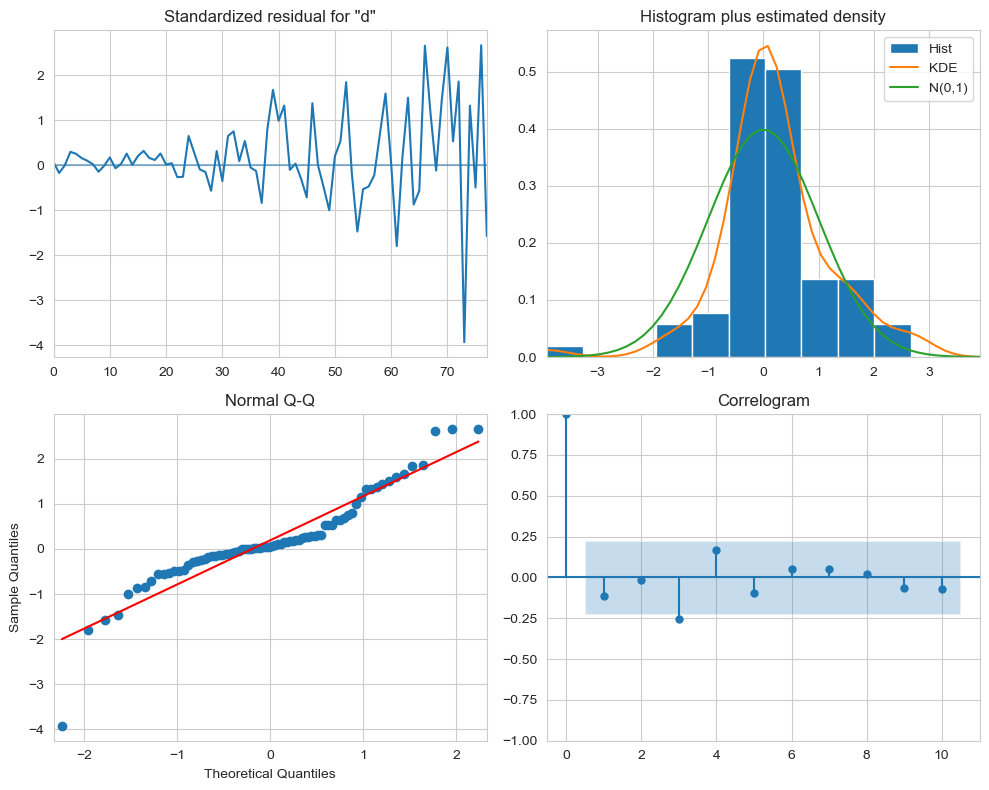

In [82]:
model_fit.plot_diagnostics(figsize=(10, 8))
plt.tight_layout()

* Top-left: It shows that the data's mean seems to be constant. However, the variance isn't.
* Top-right: We can say that the data remebles a normal distribution, so similar to white noise.
* Bottom-left: From the Q-Q plot we can say that the residuals seem to be straight.
* Bottom-right: We can say that maybe at lag=3, there seems to be some correlation. But as we don't observe this in other lags, we can say that its maybe just due to chance and it can be ignored.

In [83]:
residuals = model_fit.resid

In [84]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung = acorr_ljungbox(residuals, np.arange(1, 11, 1)) # the arrange specifies the lags upto which we are testing, here we are testing the first 10 lags
ljung['lb_pvalue']

1     0.193633
2     0.428309
3     0.061810
4     0.054403
5     0.077802
6     0.118753
7     0.167605
8     0.236653
9     0.292245
10    0.341772
Name: lb_pvalue, dtype: float64

* All the values are greater than 0.05, so the residuals are uncorrelated.

## Forcasting using the model

In [86]:
test = df.iloc[-4:]

In [87]:
test

,date,data
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


* We make a naive prediction, by saying that the previous 4 predictions will be the next 4 predictions.

In [88]:
test['naive_pred'] = df['data'].iloc[76:80].values

C:\Users\delli\AppData\Local\Temp\ipykernel_18140\723509931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_pred'] = df['data'].iloc[76:80].values


In [89]:
test

,date,data,naive_pred
80,1980-01-01,16.20,14.04
81,1980-04-01,14.67,12.96
82,1980-07-02,16.02,14.85
83,1980-10-01,11.61,9.99


In [90]:
ARIMA_pred = model_fit.get_prediction(80, 83).predicted_mean

In [91]:
test['ARIMA_pred'] = ARIMA_pred

C:\Users\delli\AppData\Local\Temp\ipykernel_18140\3594730349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA_pred'] = ARIMA_pred


In [92]:
test

,date,data,naive_pred,ARIMA_pred
80,1980-01-01,16.20,14.04,15.850042
81,1980-04-01,14.67,12.96,14.381625
82,1980-07-02,16.02,14.85,16.370624
83,1980-10-01,11.61,9.99,11.681393


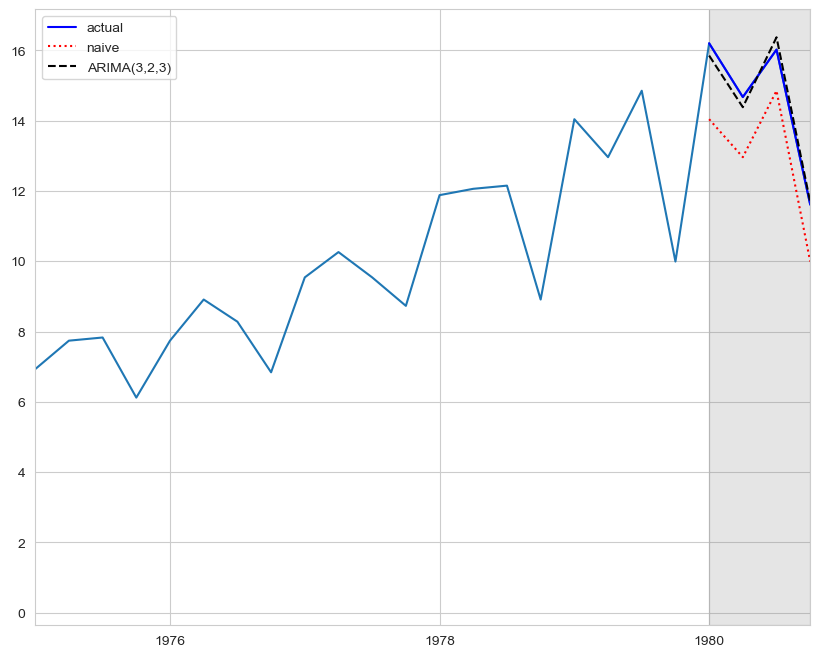

In [109]:
plt.plot(df['date'], df['data'])
plt.rcParams['figure.figsize'] = [10, 8]
plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
plt.plot(test['data'], 'b-', label='actual')
plt.plot(test['naive_pred'], 'r:', label='naive')
plt.plot(test['ARIMA_pred'], 'k--', label='ARIMA(3,2,3)')
plt.axvspan(80, 83, color='#808080', alpha=0.2)
plt.xlim(60, 83)
plt.legend()

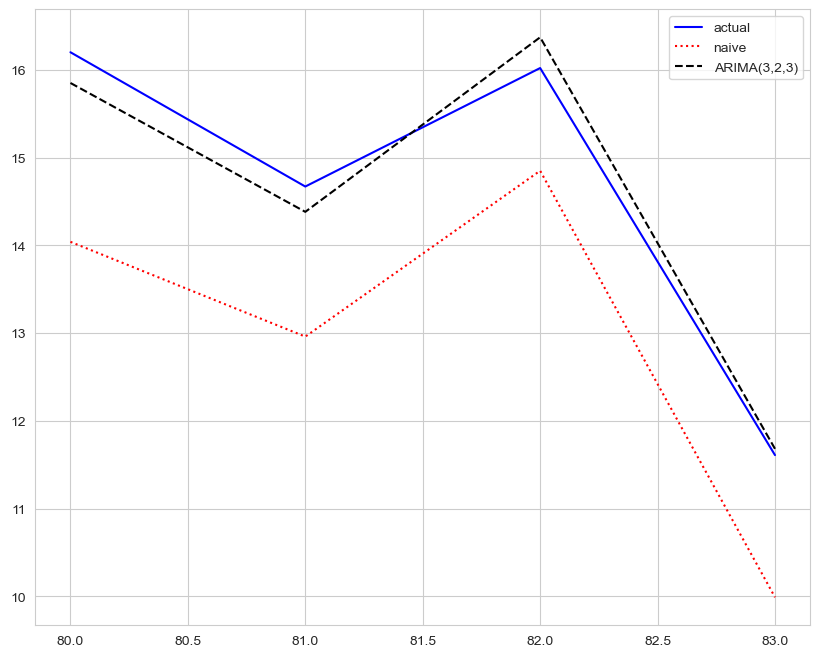

In [110]:
plt.plot(test['data'], 'b-', label='actual')
plt.plot(test['naive_pred'], 'r:', label='naive')
plt.plot(test['ARIMA_pred'], 'k--', label='ARIMA(3,2,3)')
plt.legend()

## Quantifying the error

* We can quantify the error using the mean absolute percentage error measure.

In [101]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [103]:
mape_naive = mape(test['data'], test['naive_pred']) 
mape_ARIMA = mape(test['data'], test['ARIMA_pred'])

Text(0, 0.5, 'MAPE (%)')

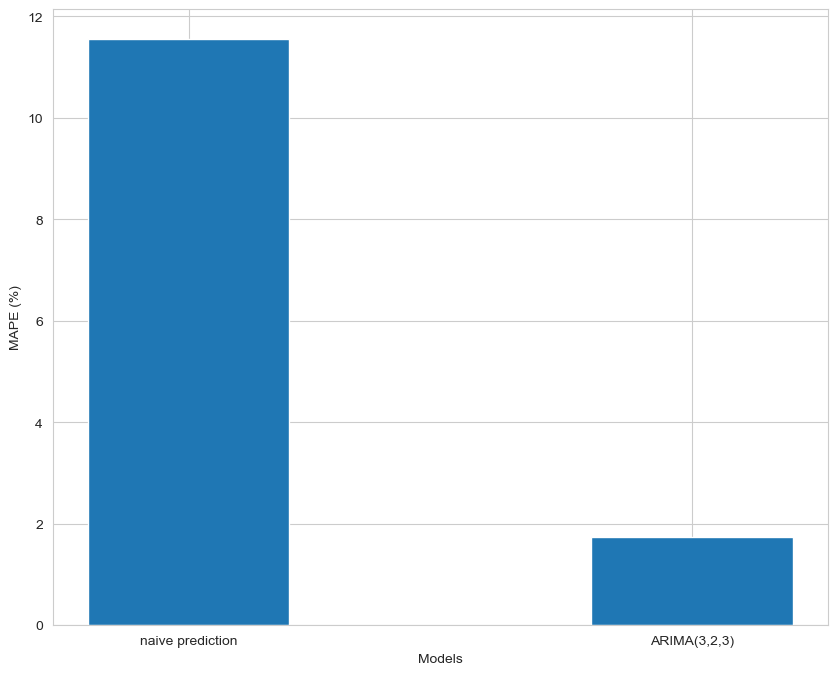

In [107]:
plt.bar(['naive prediction', 'ARIMA(3,2,3)'], [mape_naive, mape_ARIMA], width=0.4)
plt.xlabel('Models')
plt.ylabel('MAPE (%)')

* As we can see the ARIMA model is lot better at the predictions than the naive predictions.